In [4]:
import os
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
HOME = os.path.expanduser('~')
NEWS_DATA_DIR = "Projects/Datasets/public_news_set"
IMAGE_DATA_DIR = "Projects/Datasets/public_image_set"
TRAIN_FILE = "multimodal_train.tsv"
TEST_FILE = "multimodal_test_public.tsv"
VALID_FLIE = "multimodal_validate.tsv"
SUFFIX = '.jpg'

In [3]:
mid_train = pd.read_csv(os.path.join(HOME, NEWS_DATA_DIR, TRAIN_FILE), sep='\t')
mid_test = pd.read_csv(os.path.join(HOME, NEWS_DATA_DIR, TEST_FILE), sep='\t')
mid_valid = pd.read_csv(os.path.join(HOME, NEWS_DATA_DIR, VALID_FLIE), sep='\t')

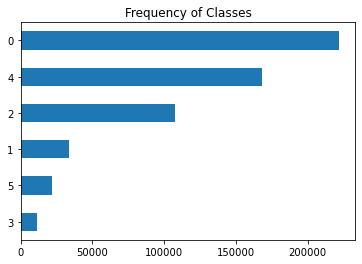

In [6]:
mid_train['6_way_label'].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

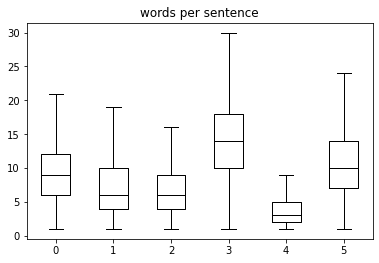

In [8]:
mid_train['words per sentence'] = mid_train['clean_title'].str.split().apply(len)
mid_train.boxplot("words per sentence", by='6_way_label', grid=False, showfliers=False, color='black')
plt.suptitle("")
plt.xlabel("")
plt.show()

## Clean data, remove undredable image

In [7]:
def image_valid(item):
    try:
        im = Image.open(os.path.join(HOME, IMAGE_DATA_DIR, item + ".jpg"))
    except:
        return False
    else:
        return True


In [5]:
image_valid('fwef')

/home/yangu/Projects/Datasets/public_image_set/fwef.jpg


False

In [12]:
len(mid_train), len(mid_valid), len(mid_test)

(564000, 59342, 59319)

In [14]:
mid_train = mid_train[mid_train.id.apply(image_valid)]
mid_valid = mid_valid[mid_valid.id.apply(image_valid)]
mid_test = mid_test[mid_test.id.apply(image_valid)]

/home/yangu/miniconda3/envs/th_env/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (110718270 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/yangu/miniconda3/envs/th_env/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (154995913 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/yangu/miniconda3/envs/th_env/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (156250000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/home/yangu/miniconda3/envs/th_env/lib/python3.10/site-packages/PIL/Image.py:2896: DecompressionBombWarning: Image size (127383200 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [16]:
len(mid_train), len(mid_valid), len(mid_test)

(563613, 59299, 59271)

In [18]:
mid_train.to_csv('multimodal_train_cleaned.tsv', sep='\t', index=False)
mid_valid.to_csv('multimodal_valid_cleaned.tsv', sep='\t', index=False)
mid_test.to_csv('multimodal_test_cleaned.tsv', sep='\t', index=False)